## Kaggle 데이터 다운로드

Google Colab 에서 **Kaggle API**를 활용해 데이터를 직접 다운로드 받습니다.  

*   항목 추가
*   항목 추가


먼저 패키지를 설치합니다.

In [ ]:
!pip install kaggle

패키지를 설치한 후, Kaggle.Json 파일을 업로드합니다.

In [ ]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length(bytes)'.format(name=fn, length=len(uploaded[fn])))

!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

정상적으로 Kaggle.Json 파일을 업로드한 후, 이제 Kaggle 명령어를 활용해 데이터를 다운로드 받습니다. 

In [ ]:
!kaggle competitions download -c new-york-city-taxi-fare-prediction
!unzip new-york-city-taxi-fare-prediction.zip

  0% 0.00/960k [00:00<?, ?B/s]
100% 960k/960k [00:00<00:00, 65.1MB/s]
  0% 0.00/335k [00:00<?, ?B/s]
100% 335k/335k [00:00<00:00, 110MB/s]
  0% 0.00/486 [00:00<?, ?B/s]
100% 486/486 [00:00<00:00, 415kB/s]
100% 1.55G/1.56G [00:15<00:00, 147MB/s]
100% 1.56G/1.56G [00:15<00:00, 108MB/s]
unzip:  cannot find or open new-york-city-taxi-fare-prediction.zip, new-york-city-taxi-fare-prediction.zip.zip or new-york-city-taxi-fare-prediction.zip.ZIP.


총 4개의 파일을 다운로드 받을 수 있습니다.  
시간이 다소 소요됩니다.

In [ ]:
!unzip train.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               


데이터의 파일 크기를 알려주는 함수입니다.  
**전체적인 데이터의 크기** 등을 확인할 때 도움됩니다.

In [ ]:
import os

def convert_bytes(file_path, unit=None):
  size = os.path.getsize(file_path)
  if unit == "KB":
    return print('File size: ' + str(round(size / 1024, 3)) + ' Kilobytes')
  elif unit == "MB":
    return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' Megabytes')
  elif unit == "GB":
    return print('File size: ' + str(round(size / (1024 * 1024 * 1024), 3)) + ' Gigabytes')
  else:
    return print('File size: ' + str(size) + ' bytes')

file_path = 'train.csv'
convert_bytes(file_path)
convert_bytes(file_path, 'GB')

File size: 5697178298 bytes
File size: 5.306 Gigabytes


파일의 경로만 안다면 다양한 데이터 크기를 쉽게 구할 수 있습니다.  
Train, Test,Sample_Submission 파일 크기를 Bytes,KB,MB,GB 단위로 각각 출력해봅시다.

In [ ]:
file_list = ['train.csv', 'test.csv', 'sample_submission.csv']
for file in file_list:
  print("The {file} size: ".format(file=file))
  convert_bytes(file)
  convert_bytes(file, 'KB')
  convert_bytes(file, 'MB')
  convert_bytes(file, 'GB')
  print("--" * 5)

The train.csv size: 
File size: 5697178298 bytes
File size: 5563650.682 Kilobytes
File size: 5433.253 Megabytes
File size: 5.306 Gigabytes
----------
The test.csv size: 
File size: 983020 bytes
File size: 959.98 Kilobytes
File size: 0.937 Megabytes
File size: 0.001 Gigabytes
----------
The sample_submission.csv size: 
File size: 343271 bytes
File size: 335.226 Kilobytes
File size: 0.327 Megabytes
File size: 0.0 Gigabytes
----------


## 라이브러리 및 데이터 로드하기 불러오기

데이터 시각화를 위한 라이브러리를 불러옵시다.  
메모리 관리를 위해 전체 데이터를 올리기보다는 일부만 올립니다.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

def skip_logic(index, skip_num):
    if index % skip_num == 0:
        return False
    return True

train = pd.read_csv('./train.csv', skiprows=lambda x: skip_logic(x, 4), parse_dates=["pickup_datetime"])
print(train.shape)
test = pd.read_csv('./test.csv')
submission = pd.read_csv('./sample_submission.csv')

(13855964, 8)


## 데이터 탐색

훈련 데이터의 기본 정보를 탐색해봅시다.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13855964 entries, 0 to 13855963
Data columns (total 8 columns):
 #   Column             Dtype              
---  ------             -----              
 0   key                object             
 1   fare_amount        float64            
 2   pickup_datetime    datetime64[ns, UTC]
 3   pickup_longitude   float64            
 4   pickup_latitude    float64            
 5   dropoff_longitude  float64            
 6   dropoff_latitude   float64            
 7   passenger_count    int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 845.7+ MB


테스트 데이터의 기본 정보를 탐색해봅시다.

In [ ]:
# 테스트 데이터의 기본 정보를 탐색하는 코드를 입력해주세요.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                9914 non-null   object 
 1   pickup_datetime    9914 non-null   object 
 2   pickup_longitude   9914 non-null   float64
 3   pickup_latitude    9914 non-null   float64
 4   dropoff_longitude  9914 non-null   float64
 5   dropoff_latitude   9914 non-null   float64
 6   passenger_count    9914 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 542.3+ KB


두 데이터를 비교한 결과 Fare_Amount가 테스트 데이터에 없는 것으로 보아 종속 변수로 추정할 수 있습니다.  
독립 변수는 크게 7개로 구성되는 것을 확인할 수 있습니다.  
- Key: 각 행을 구별하는 고유한 문자열
- Pickup_Datetime: 택시 승차 시 시간
- Pickup_Longitude: 택시 승차 시 경도
- Pickup_Latitude: 택시 승차 시 위도
- Dropoff_Longitude: 택시 하차 시 경도
- Dropoff_Latitude: 택시 하차 시 위도
- Passenger_Count: 택시 승객 수
- Fare_Amount: 택시 요금($)

첫 번째 5행까지만 데이터를 출력해봅시다.

In [ ]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
1,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00+00:00,-73.951300,40.774138,-73.990095,40.751048,1
2,2012-12-24 11:24:00.00000098,5.5,2012-12-24 11:24:00+00:00,0.000000,0.000000,0.000000,0.000000,3
3,2013-11-23 12:57:00.000000190,5.0,2013-11-23 12:57:00+00:00,0.000000,0.000000,0.000000,0.000000,1
4,2014-12-06 20:36:22.0000008,4.0,2014-12-06 20:36:22+00:00,-73.979815,40.751902,-73.979446,40.755481,1


### fare_amount


종속 변수에 해당하는 Fare_Amount의 최댓값과 최솟값을 구해보겠습니다. 

In [ ]:
print("Minimum Value of train:", #train data의 Fare_Amount 변수의 최소값을 가져옵시다.
print("Maximum Value of train:", #train data의 Fare_Amount 변수의 최대값을 가져옵시다.

Minimum Value of train: -300.0
Maximum Value of train: 93963.36


최솟값이 -300이 나오는 것을 확인할 수 있습니다.  
**해석하기 어려운 데이터**는 가급적 삭제하는 것이 좋습니다.  
총 음수의 개수를 확인해봅시다.

In [ ]:
print("Fare Amount < 0:", sum(#fare_amount 값이 음수인 값을 가져옵시다.))
print("Fare Amount > 0:", sum(#fare_amount 값이 양수인 값을 가져옵시다.))

Fare Amount < 0: 610
Fare Amount > 0: 13855007


In [ ]:
from collections import Counter
Counter(train['fare_amount'] < 0)

Counter({False: 13855354, True: 610})

총 610개의 음수 데이터가 있음을 확인하고, 이 데이터를 삭제합니다.

In [ ]:
train = train.drop(train[train['fare_amount'] < 0].index, axis=0).reset_index(drop=True)
Counter(train['fare_amount'] < 0)

Counter({False: 13855354})

그 다음에는 **극단값을 삭제**해 봅시다.  
500달러 이상 지급된 데이터가 총 6개입니다.  
그중에서 특정 데이터는 93963.36 달러가 나오는데, 실제 이 금액이 나온 것인지 단순히 전산 오류인지 확인하기 어려우므로, 극단적인 데이터는 제거하는 것이 좋습니다. 

In [ ]:
Counter(train['fare_amount'] > 500)

Counter({False: 13855348, True: 6})

In [ ]:
train = train.drop(train[train['fare_amount'] > 500].index, axis=0).reset_index(drop=True)
print("Minimum Value of train:", train['fare_amount'].min())
print("Maximum Value of train:", train['fare_amount'].max())

Minimum Value of train: 0.0
Maximum Value of train: 500.0


그런데 **데이터의 개수가 매우 많음**을 볼 수 있습니다.  
머신러닝 모형을 만들 때 시각화의 목적은 데이터의 주요 특징을 효과적으로 파악하는데 있습니다. 데이터가 크면, 한 장의 시각화를 출력하는 데에도 오래걸릴 수 있으므로, **데이터를 한꺼번에 시각화하는 것은 바람직하지 않습니다.**  
이럴 때는 **데이터의 크기를 줄이는 것**이 매우 좋습니다.  


데이터 샘플링을 통해 크기를 줄이는 것이 좋은데, 일반적으로 기존 데이터와 가장 유사한 형태로 표본을 추출하는 것이 좋습니다.  
이때 주로 쓰는 기법 중의 하나가 **층화 추출 샘플링(Stratified Sampling)**입니다.   
모집단이 중복되지 않도록 특정 그룹의 비율로 층울 나눈 다음 각 층에서 표본을 추출하는 방법입니다. 

### Sampling

여러 변수 중에도 **Passenger_Count**를 그룹으로 하는 것이 좋습니다.  
그런데 이 데이터에도 이상치가 존재합니다. 확인해봅시다.

In [ ]:
train['passenger_count'].unique()

array([  1,   3,   6,   2,   5,   4,   0, 208, 129,  51,   8,   9])

0명인데 비용이 나온 것은 선뜻 이해가 되지 않고, 51, 208명은 전산 오류라고 밖에 설명하기 어렵습니다. 그러므로 6 이상 데이터는 삭제합니다. 

In [ ]:
train = train.drop(train[train['passenger_count'] > 6].index, axis=0).reset_index(drop=True)
train['passenger_count'].unique()

array([1, 3, 6, 2, 5, 4, 0])

0에 해당하는 데이터도 삭제합니다. 

In [ ]:
train = train.drop(train[train['passenger_count'] == 0].index, axis=0).reset_index(drop=True)
train['passenger_count'].unique()

array([1, 3, 6, 2, 5, 4])

이제 Passenger_Count의 비율을 확인합시다. 이때 Value_Counts() 안에 반드시 Normalize=True가 되게 주의해주세요.

In [ ]:
train['passenger_count'].value_counts(normalize=True)

1    0.693959
2    0.148144
5    0.071225
3    0.044029
4    0.021383
6    0.021260
Name: passenger_count, dtype: float64

1명 탑승한 택시 승객의 비율이 약 70%에 해당하는 것을 확인할 수 있습니다. 이제 남은 것은 층화 추출입니다.  
Pandas 라이브러리를 활용해 층화추출을 할 수도 있지만, **Sklearn을** 활용하면 더 가독성 있는 코드로 구현할 수 있어 **StratifiedShuffleSplit 모듈**을 활용합니다.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

sample = pd.DataFrame({'group': np.repeat(['A', 'B', 'C'], (60, 40, 20)),
                   'sample_value': np.random.randn(120)})

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.7, random_state=42)

for train_index, test_index in split.split(sample, sample['group']):
  strata_train_set = sample.loc[train_index]
  test_set = sample.loc[test_index]

print(sample['group'].value_counts(normalize=True))
print(#sample의 shape를 확인해봅시다.)
print(strata_train_set['group'].value_counts(normalize=True))
print(strata_train_set.shape)

A    0.500000
B    0.333333
C    0.166667
Name: group, dtype: float64
(120, 2)
A    0.500000
B    0.333333
C    0.166667
Name: group, dtype: float64
(36, 2)


본 데이터에 적용해봅시다.

In [ ]:
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.001, random_state=42)

for large_index, sample_index in split.split(train, train['passenger_count']):
  large_df = train.loc[large_index]
  sample_df = train.loc[sample_index]

In [ ]:
print("train:\n", train['passenger_count'].value_counts(normalize=True), train.shape)
print("sample:\n", sample_df['passenger_count'].value_counts(normalize=True), sample_df.shape)

train:
 1    0.693959
2    0.148144
5    0.071225
3    0.044029
4    0.021383
6    0.021260
Name: passenger_count, dtype: float64 (13806160, 8)
sample:
 1    0.693996
2    0.148113
5    0.071196
3    0.044036
4    0.021366
6    0.021294
Name: passenger_count, dtype: float64 (13807, 8)


데이터의 크기는 0.1%로 줄어들었지만, 그 **비율은 그대로**임을 확인할 수 있습니다.

간단한 시각화를 그려봅시다.

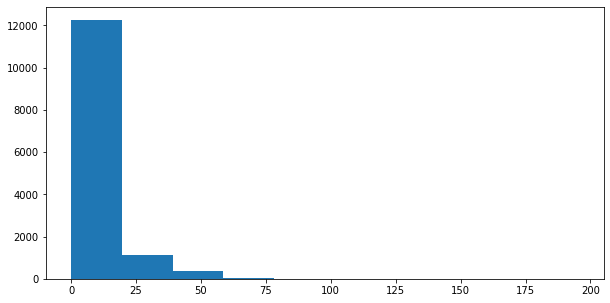

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(sample_df['fare_amount'])
#plt를 보여봅시다.

전형적으로 왜도의 그래프입니다.  특히 0~25달러 구간이 가장 많은 비율을 보여줍니다.  
Feature Engineering을 진행할 때 로그 변환을 진행합니다.

### longitude & latitude

위도와 경도에 대해 알아봅시다.  
**위도의 범위는 -90~90**이며, **경도의 범위는 -180~180**입니다.  
해당 범위를 벗어나는 데이터는 제거해야 합니다. 

In [ ]:
from collections import Counter
#승차시 위도가 -90 보다 작은 값의 비율을 찾아보세요. 

Counter({False: 13806091, True: 69})

-90보다 더 작은 데이터는 총 69개가 있군요.

In [ ]:
#승차시 위도가 -90 보다 큰 값의 비율을 찾아보세요. 

90보다 큰 데이터는 176개가 있습니다.

In [ ]:
train = train.drop(train[train['pickup_latitude'] <- 90].index, axis=0).reset_index(drop=True)
train = train.drop(train[train['pickup_latitude'] > 90].index, axis=0).reset_index(drop=True)
Counter(train['pickup_latitude'] > 90)

이상치를 제거한 모습입니다. 

In [ ]:
train = train.drop(train[train['dropoff_latitude'] <- 90].index, axis=0).reset_index(drop=True)
train = train.drop(train[train['dropoff_latitude'] > 90].index, axis=0).reset_index(drop=True)
train = train.drop(train[train['pickup_longitude'] <- 180].index, axis=0).reset_index(drop=True)
train = train.drop(train[train['pickup_longitude'] > 180].index, axis=0).reset_index(drop=True)
train = train.drop(train[train['dropoff_longitude'] <- 180].index, axis=0).reset_index(drop=True)
train = train.drop(train[train['dropoff_longitude'] > 180].index, axis=0).reset_index(drop=True)
#이상치를 제거한 모습을 확인해보세요.

나머지 데이터들도 다음과 같이 정리할 수 있습니다.

아직 정리하지 못한 변수 Key, Pickup_Datetime을 확인해 봅시다.  
데이터 유형이 날짜 데이터인지부터 확인해 봅시다.

In [ ]:
train.iloc[:3, 0]

0     2012-04-21 04:30:42.0000001
1    2012-01-04 17:22:00.00000081
2    2012-12-24 11:24:00.00000098
Name: key, dtype: object

날짜 데이터 형식이 아닌 Object, 문자열로 기록된 것을 확인할 수 있습니다. 

In [ ]:
#iloc 함수를 사용해서, pickup_datetime 변수를 datetime64 유형으로 바꾸어봅시다.

0   2012-04-21 04:30:42+00:00
1   2012-01-04 17:22:00+00:00
2   2012-12-24 11:24:00+00:00
Name: pickup_datetime, dtype: datetime64[ns, UTC]

위 데이터 모두 날짜 데이터로 변환합시다.

이번에는 위도와 경도의 이상치들을 제거한 후 간단히 시각화를 구현합시다.  
전체 데이터보다는 층화 추출을 이용해 sample 데이터만 추출합니다.

In [ ]:
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.001, random_state=42)

for large_index, sample_index in split.split(train, train['passenger_count']):
  large_df = train.loc[large_index]
  sample_df = train.loc[sample_index]

In [ ]:
sample_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
13585037,2014-01-25 16:41:42.0000001,9.5,2014-01-25 16:41:42+00:00,-73.988301,40.723365,-73.970528,40.750846,1
11400151,2015-06-30 13:28:21.0000006,14.0,2015-06-30 13:28:21+00:00,-74.003799,40.726135,-73.981010,40.750507,3
11073453,2014-06-27 22:35:45.0000001,14.5,2014-06-27 22:35:45+00:00,-73.987814,40.765200,-73.983463,40.726239,3
7078290,2014-11-02 22:36:14.0000001,9.5,2014-11-02 22:36:14+00:00,0.000000,0.000000,-73.982215,40.777453,1
8266036,2013-12-12 21:20:00.000000164,8.5,2013-12-12 21:20:00+00:00,-73.962823,40.776630,-73.978922,40.761592,1


위도와 경도로 나타내는 그래프는 지도 위에 점을 찍는 것입니다.  
뉴욕의 지도를 가져와서 Matplotlib를 활용해 정적 그래프를 그리겠습니다.  

In [ ]:
Bounding_Box = (-74.5, -72.8, 40.5, 41.8) 

def select_within_boundingbox(data, BB):
    return (data.pickup_longitude >= BB[0]) & (data.pickup_longitude <= BB[1]) & \
           (data.pickup_latitude >= BB[2]) & (data.pickup_latitude <= BB[3]) & \
           (data.dropoff_longitude >= BB[0]) & (data.dropoff_longitude <= BB[1]) & \
           (data.dropoff_latitude >= BB[2]) & (data.dropoff_latitude <= BB[3])

print('Old size: %d' % len(sample_df))
sample_df = sample_df[select_within_boundingbox(sample_df, Bounding_Box)]
print('New size: %d' % len(sample_df))

Old size: 13806
New size: 13499


이 함수의 기능은 필터링입니다. 차량을 탑승한 위치의 위도와 경도, 하차한 위치의 위도와 경도를 표시합니다.  
표시한 지도 외에 데이터가 이상치로 존재하면 삭제하는 일종의 전처리 코드로 볼 수 있습니다. 

뉴욕의 지도만 출력해보겠습니다.  
파이썬을 활용해 웹 크롤링할 때 사용되는 SSl._Create_Unverified_Context() 를 활용하여 접근해보겠습니다. 

지도 이미지의 주소와 Bounding_Box를 정의해보겠습니다.  
이미지를 읽어들일 때는 Plt.Imread( ) 를 활용한 뒤에 Plt.Imshow( )를 활용해 출력할 수 있습니다.

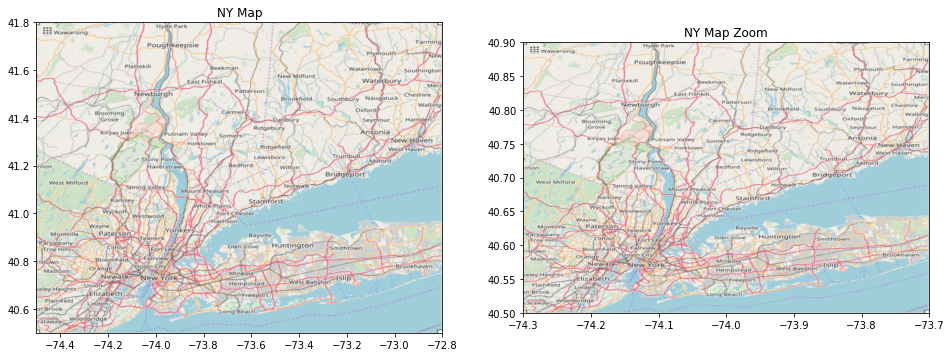

In [ ]:
import ssl
from urllib.request import urlopen
context = ssl._create_unverified_context() 

# load image of NYC map
Bounding_Box = (-74.5, -72.8, 40.5, 41.8)
NYC_MAP_img_path = 'https://aiblog.nl/download/nyc_-74.5_-72.8_40.5_41.8.png'
NYC_MAP = urlopen(NYC_MAP_img_path, context=context)
nyc_map = plt.imread(NYC_MAP)

# load extra image to zoom in on NYC
Bounding_Box_Zoom = (-74.3, -73.7, 40.5, 40.9)
NYC_MAP_ZOOM_img_path = 'https://aiblog.nl/download/nyc_-74.3_-73.7_40.5_40.9.png'
NYC_MAP_ZOOM = # url을 오픈해봅시다. 
nyc_map_zoom = plt.imread(NYC_MAP_ZOOM)

fig, ax = plt.subplots(1, 2, figsize=(16, 10))
ax[0].imshow(nyc_map, zorder=0, extent=Bounding_Box)
ax[0].set_title("NY Map")

ax[1].imshow(nyc_map_zoom, zorder=0, extent=Bounding_Box_Zoom)
ax[1].set_title("NY Map Zoom")

plt.show()

이제 **이미지 위에 산점도**를 작성할 때 쓰는 **Scatter( ) 함**수를 활용해 


시각화를 그립니다.  
그래프를 그리는 방식은 Matplotlib 라이브러리를 활용한 방식과 유사합니다. 

반복적인 그래프 작성을 위한 함수입니다. 

In [ ]:
# this function will be used more often to plot data on the NYC map
def scatter_plot_on_map(df, Bounding_Box, nyc_map, s=10, alpha=0.2):
    fig, ax = plt.subplots(1, 2, figsize=(16,10))
    ax[0].scatter(df.pickup_longitude, df.pickup_latitude, zorder=1, alpha=alpha, c='r', s=s)
    ax[0].set_xlim((Bounding_Box[0], Bounding_Box[1]))
    ax[0].set_ylim((Bounding_Box[2], Bounding_Box[3]))
    ax[0].set_title('Pickup locations')
    ax[0].imshow(nyc_map, zorder=0, extent=Bounding_Box)

    ax[1].scatter(df.dropoff_longitude, df.dropoff_latitude, zorder=1, alpha=alpha, c='r', s=s)
    # zoom 된 화면도 똑같이 적용해봅시다.
    # zoom 된 화면도 똑같이 적용해봅시다.
    # zoom 된 화면도 똑같이 적용해봅시다.
    # zoom 된 화면도 똑같이 적용해봅시다.

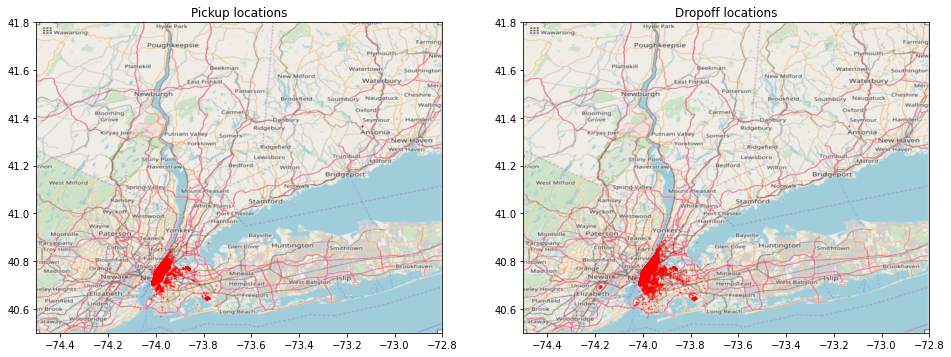

In [ ]:
# plot training data on map
scatter_plot_on_map(sample_df, Bounding_Box, nyc_map, s=1, alpha=0.3)

복잡해 보이는 다음 사진은 크게 **두 개의 구조**로 이루어집니다.  
먼저 산점도를 작성하고, 각각의 축을 미리 정의한 Bounding Box로 x축과 y축의 범위를 지정합니다.  
위도와 경도를 x축과 y축으로 변경해 처리하고, 지도를 추가하게 됩니다. 
지도를 보면 차량을 탑승한 위치와 하차한 위치가 조금씩 다른 것을 확인할 수 있습니다. 

더 명확한 시각화 결과를 보기 위해 Zoom을 적용해보겠습니다. 

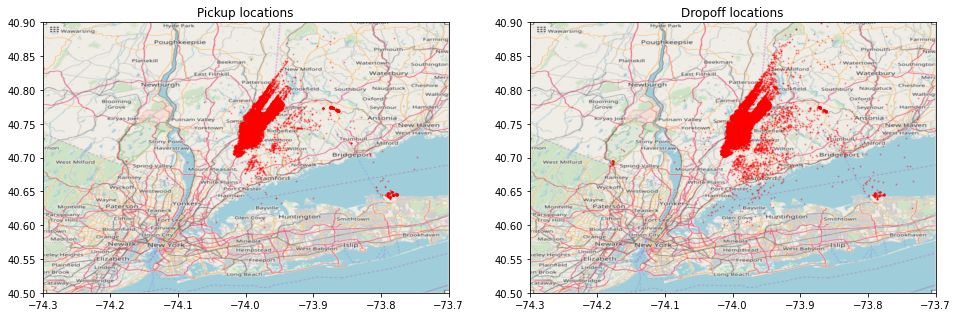

In [ ]:
scatter_plot_on_map(sample_df, Bounding_Box_Zoom, nyc_map_zoom, s=1, alpha=0.3)

### Date
- 날짜 변동

이제 마지막 변수인 날짜 데이터를 처리한 후 간단하게 시각화로 처리합니다.  
변수 Key와 Pickup_Datetime은 모두 날짜 형식이지만, **날짜 및 시분초 모두 같은 것**을 확인할 수 있기에, Pickup_Datetime만을 사용해 데이터를 변환합니다. 

In [ ]:
sample_df['Year'] = sample_df['pickup_datetime'].dt.year
sample_df['Month'] = #pickup_datetime 의 월만 추출합시다.
sample_df['Date'] = #pickup_datetime 의 일만 추출합시다.
sample_df['Day of Week'] = #pickup_datetime 의 주만 추출합시다.
sample_df['Hour'] = #pickup_datetime 의 시간만 추출합시다.

In [ ]:
print(sample_df.iloc[:, 8:])

          Year  Month  Date  Day of Week  Hour
13585037  2014      1    25            5    16
11400151  2015      6    30            1    13
11073453  2014      6    27            4    22
8266036   2013     12    12            3    21
42664     2015      1    14            2    11
...        ...    ...   ...          ...   ...
12538416  2012      3    16            4    20
9310708   2012     10    16            1    19
12218000  2014      5    27            1    13
6983390   2015      1    16            4     8
6168861   2013      4     1            0    12

[13499 rows x 5 columns]


Day of Week의 값이 숫자로 나옵니다.  
이때는 메소드 중에서 Dayofweek의 매뉴얼은 참조하면, Monday=0에서부터 Sunday=6이라고 표시된 것을 확인할 수 있습니다. 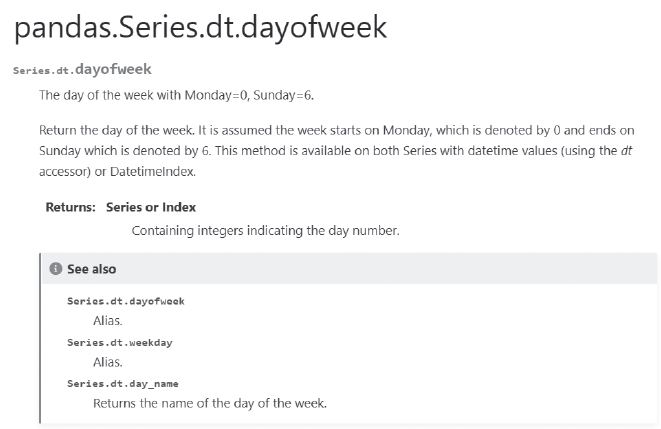

날짜를 x축에 대입한 그래프의 모습입니다.

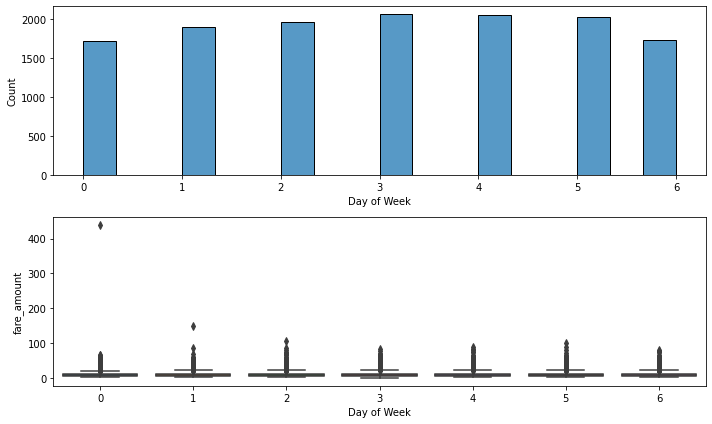

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize=(10, 6))
sns.histplot(sample_df['Day of Week'], ax=ax[0])
ax[0].set_xlabel('Day of Week')
ax[0].set_ylabel('Count')

sns.boxplot(x = 'Day of Week', y = 'fare_amount', data=sample_df, ax=ax[1])
ax[1].set_xlabel('Day of Week')

fig.tight_layout()
plt.show()

첫 번째 그림을 보면 목, 금, 토요일에 이용 객수가 많은 것을 확인할 수 있습니다.  
두 번째 그림에서는 월요일과 화요일의 이상치가 눈에 띄지만, 박스 플롯을 통해서는 가시적으로 비교가 쉽지 않습니다.  

시간대별 금액을 확인합니다. 

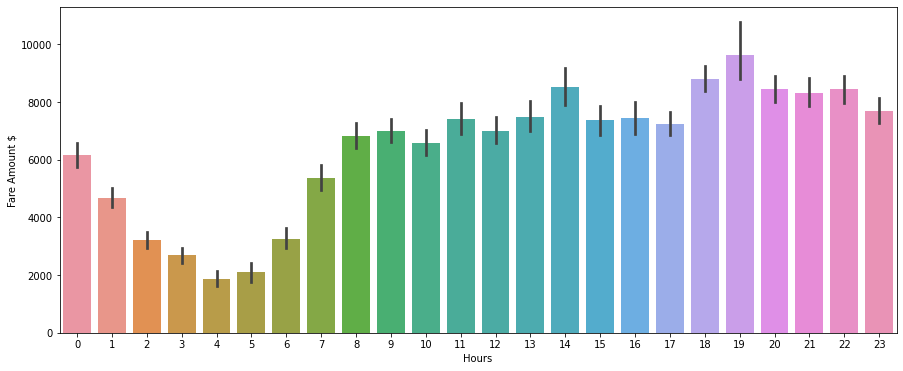

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(# 시간 별 요금 그래프를 그려봅시다. , estimator=sum)
ax.set_xlabel('Hours')
ax.set_ylabel('Fare Amount $')

plt.show()

Estimator의 기본값은 NP.Mean으로 평균값을 의미합니다.   
만약 Sum으로 바꿔서 그래프를 작성한다면, 언제 가장 많은 요금이 발생하는지 알 수 있습니다.

다음은 요일별 운임료입니다. 

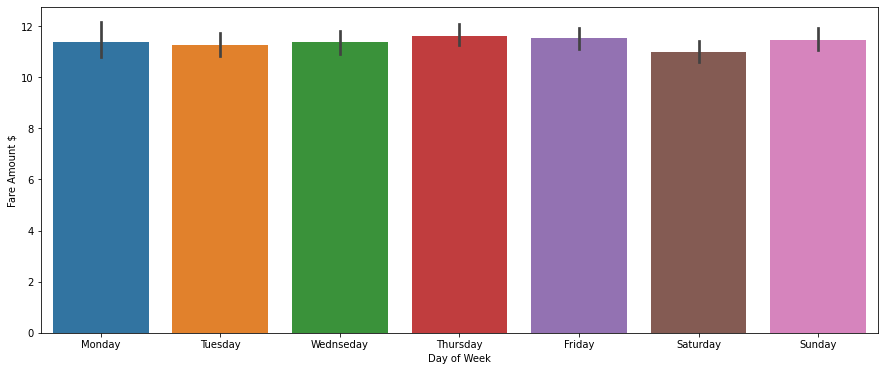

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(#요일 별 요금 그래프를 그려봅시다. )
ax.set_xlabel('Day of Week')
ax.set_ylabel('Fare Amount $')
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednseday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.show()

## Feature Engineering

이제 **Feature Engineering**을 진행할 차례입니다.  
데이터의 크기를 줄여 약 55,423개의 데이터로만 진행해보겠습니다.


### 결측치 및 이상치 삭제

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [ ]:
def skip_logic(index, skip_num):
    if index % skip_num == 0:
        return False
    return True

train = pd.read_csv('./train.csv', skiprows=lambda x: skip_logic(x, 1000))
print(train.shape)
test = pd.read_csv('./test.csv')
submission = pd.read_csv('./sample_submission.csv')

(55423, 8)


훈련 데이터 및 테스트 데이터에도 일괄 적용하도록 Preprocessing 함수를 만듭니다.  
테스트 데이터에는 Fare_Amount가 없어, If 구문을 적용해 차별을 두어야 합니다.  
 

승하차 시의 위도와 경도는 테스트 데이터 세트에 맞춰 기재해야 합니다.  
위도와 경도의 이상치 기준을 테스트 데이터 세트에 맞춰야 하기 때문입니다. 
승하차 시의 경도와 위도를 모두 비교하면 최솟값과 최대값을 구할 수 있습니다.  
먼저 **경도의 최솟값과 최댓값**을 구해보겠습니다. 

In [ ]:
print("Longitude Boundary in test")
print("Minimum Value of Longitude:", min(test.pickup_longitude.min(), test.dropoff_longitude.min()))
print("Maximum Value of Longitude:", max(test.pickup_longitude.max(), test.dropoff_longitude.max()))

Longitude Boundary in test
Minimum Value of Longitude: -74.263242
Maximum Value of Longitude: -72.986532


이번에는 **위도의 최솟값과 최대값**을 구합니다. 

In [ ]:
print("Latitude Boundary in test")
print("Minimum Value of Latitude:", #승하차 위도의 최소값을 구해봅시다.)
print("Maximum Value of Latitude:", #승하차 위도의 최대값을 구해봅시다.)

Latitude Boundary in test
Minimum Value of Latitude: 40.573143
Maximum Value of Latitude: 41.709555


데이터를 Boundary 딕셔너리의 개별 값으로 입력합니다. 

In [ ]:
def preprocssing(data):
  print("Old Shape Size:", data.shape)  

  # Remove Missing Value
  data = data.drop(data[data.isnull().any(1)].index, axis = 0)

  # Removing Outliers
  if 'fare_amount' in data.columns:
    data = data.drop(#요금이 음수인 데이터를 불러와주세요.).reset_index(drop=True)
    data = data.drop(#요금이 500보다 높은 데이터를 불러와주세요.).reset_index(drop=True)

    # Removing Beyond NYC
    # 1 is beyond NY, so will delete
    boundary={'min_lng':-74.263242,'min_lat':40.573143,'max_lng':-72.986532, 'max_lat':41.709555}
    data.loc[~((data.pickup_longitude >= boundary['min_lng'] ) & (data.pickup_longitude <= boundary['max_lng']) &
            (data.pickup_latitude >= boundary['min_lat']) & (data.pickup_latitude <= boundary['max_lat']) &
            (data.dropoff_longitude >= boundary['min_lng']) & (data.dropoff_longitude <= boundary['max_lng']) &
            (data.dropoff_latitude >=boundary['min_lat']) & (train.dropoff_latitude <= boundary['max_lat'])),'is_beyond_NY']=1

    data.loc[((data.pickup_longitude >= boundary['min_lng'] ) & (data.pickup_longitude <= boundary['max_lng']) &
            (data.pickup_latitude >= boundary['min_lat']) & (data.pickup_latitude <= boundary['max_lat']) &
            (data.dropoff_longitude >= boundary['min_lng']) & (data.dropoff_longitude <= boundary['max_lng']) &
            (data.dropoff_latitude >=boundary['min_lat']) & (data.dropoff_latitude <= boundary['max_lat'])),'is_beyond_NY']=0
            
    print("Outlier vs Non Outlier Counts")
    print(data['is_beyond_NY'].value_counts())
    # print(data[data['is_beyond_NY'] == 1.0].head())
    data = data.drop(data[data['is_beyond_NY']== 1.0].index, axis=0).reset_index(drop=True)
    data.drop(['is_beyond_NY'], axis=1, inplace=True)
  
  data = data.drop(data[data['passenger_count'] > 6].index, axis=0).reset_index(drop=True)
  data = data.drop(data[data['passenger_count'] == 0].index, axis=0).reset_index(drop=True)
  data['pickup_datetime']=pd.to_datetime(data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S UTC')

  # new variables from pickup_datetime
  data['year'] = #pickup_datetime 의 년도만 추출합시다.
  data['month'] = #pickup_datetime 의 월만 추출합시다.
  data['date'] = #pickup_datetime 의 일만 추출합시다.
  data['day_of_week'] = #pickup_datetime 의 요일만 추출합시다.
  data['hour'] = #pickup_datetime 의 시간만 추출합시다.
  
  # Delete Some Variables
  data.drop(['key','pickup_datetime'], axis=1, inplace=True)

  print("New Shape Size:", data.shape)
  return data

다음은 전처리 이후의 데이터 값입니다. 

In [ ]:
new_train = preprocssing(train)
new_train

Old Shape Size: (55423, 8)
Outlier vs Non Outlier Counts
0.0    54190
1.0     1230
Name: is_beyond_NY, dtype: int64
New Shape Size: (53997, 11)


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day_of_week,hour
0,10.9,-73.988455,40.758432,-73.983816,40.730147,1,2012,5,18,4,18
1,7.5,-73.991776,40.726189,-73.987656,40.739204,5,2015,2,1,6,2
2,56.8,-73.988152,40.740112,-73.782355,40.646727,2,2012,10,23,1,7
3,14.5,-73.984455,40.759038,-74.011728,40.707793,2,2010,7,31,5,22
4,13.3,-73.983301,40.743722,-73.964523,40.710758,1,2011,2,28,0,18
...,...,...,...,...,...,...,...,...,...,...,...
53992,10.5,-73.984875,40.729762,-74.001793,40.746700,1,2013,2,3,6,22
53993,17.5,-73.984185,40.749052,-73.911797,40.761047,1,2012,12,22,5,3
53994,8.5,-73.971578,40.755180,-73.978423,40.751367,1,2013,10,14,0,8
53995,14.9,-73.999957,40.678620,-74.007187,40.728660,1,2009,8,5,2,7


본격적으로 Feature Engineering을 진행하기 위해, **도출 변수**를 하나 만들겠습니다.  
택시 탑승 및 하차 지역의 위도와 경도를 그대로 사용하기보다는 **거리**를 구하고, 위도와 경도를 제거하겠습니다.  

### 하버사인

위도와 경도를 활용해 거리를 측정하는 방식은 **하버사인 공식**을 활용할 수 있습니다.  

하버사인 공식을 사용하기 위해 패키지를 설치하겠습니다.

*   항목 추가
*   항목 추가



In [ ]:
!pip install haversine

우선 서울과 부산의 직선거리를 구해보겠습니다. 

In [ ]:
from haversine import haversine, Unit
seoul = (37.532600, 127.024612)
busan = (35.114839, 129.041494)

haversine(seoul, busan)

323.89975226124534

본 데이터에 적용하겠습니다.  
반복문을 사용해 각각의 데이터를 입력합니다.  
Haversine 함수에 **Pandas 각각의 변수를 List로 변환한 후**, 각 리스트 인덱스 값을 반복문에 적용해 하나씩 계산합니다.  

In [ ]:
distances = []
pick_lon = new_train['pickup_longitude'].tolist()
pick_lat = new_train['pickup_latitude'].tolist()
drop_lon = new_train['dropoff_longitude'].tolist()
drop_lat = new_train['dropoff_latitude'].tolist()

for row in range(len(new_train)):
  dist = haversine(#탑승 위치의 위도, 경도값을 가져옵시다., #하차 위치의 위도, 경도값을 가져옵시다.)
  distances.append(dist)

new_train['distance'] = distances
print(new_train[['fare_amount', 'distance', 'passenger_count']])

       fare_amount   distance  passenger_count
0             10.9   3.169341                1
1              7.5   1.488336                5
2             56.8  20.220492                2
3             14.5   6.144112                2
4             13.3   3.992399                1
...            ...        ...              ...
53992         10.5   2.361989                1
53993         17.5   6.241498                1
53994          8.5   0.715686                1
53995         14.9   5.597480                1
53996          8.0   1.118084                1

[53997 rows x 3 columns]


계산 결과 적정한 거리가 산출되었습니다.  
하지만 이는 도로의 거리가 아닌 직선거리라는 점을 유의할 필요가 있습니다.

### 위도 경도 데이터 삭제

In [ ]:
new_train.drop(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], axis=1, inplace=True)

In [ ]:
#새로운 데이터의 정보를 봅시다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53997 entries, 0 to 53996
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fare_amount      53997 non-null  float64
 1   passenger_count  53997 non-null  int64  
 2   year             53997 non-null  int64  
 3   month            53997 non-null  int64  
 4   date             53997 non-null  int64  
 5   day_of_week      53997 non-null  int64  
 6   hour             53997 non-null  int64  
 7   distance         53997 non-null  float64
dtypes: float64(2), int64(6)
memory usage: 3.3 MB


추가적으로 수치형 데이터의 로그 변환이나, 표준화, 정규화 등의 작업을 해줄 수 있습니다.  
Day_Of_Week와 같은 변수는 문자열 데이터로 취급할 수 있고, 이때 라벨 인코딩이나 원핫 인코딩 등을 사용해야 합니다.  
택시가 가장 많이 활용되는 지역을 찾아서 별도로 도출 변수를 만드는 과정도 진행할 수 있습니다.


이제 어느 정도 전처리가 끝난 것 같으니, 모델링을 수행하겠습니다.  
캐글에서 자주 사용되는 **Randomo Forest, XGBoost, LightGBM, 그리고 가끔 등장하는 CatBoost**를 소개하겠습니다.  
또한 **교차 검증 및 하이퍼파라미터, 스태킹 앙상블을 활용한 모형 예측**에 대해 간단히 배워보겠습니다. 

**Cross Validation**을 할 때 모형에 적합한 **하이퍼 파라미터 튜닝**을 수반해야 합니다.  
Hyper Parameter Tuning에 대해 알아보겠습니다. 

머신러닝에서의 하이퍼 파라미터 튜닝은 개별적인 모델에 대해 성능을 극대화하는 작업을 말합니다.  
하지만 이는 모델에 필요한 각각의 하이퍼 파라미터의 각 값을 이해하지 못한다면, 안 쓰는 것만 못한 방법입니다.  
꼭 파라미터를 써야 한다면, 그랜드 마스터와 같은 캐글러의 파라미터를 가져다 쓰는 것을 우선 고려할 수 있습니다. 

모형의 개발 관점에서 얘기하면 하이퍼 파라미터 튜닝의 궁극적인 대상이 Validation 데이터에 맞춰질 가능성이 있고, 이는 과적합을 의미합니다.  

## CV + Grid Search

모델의 파라미터의 의미와 모형에 적합한 최적의 파라미터들을 찾기 위해 **Graphviz패키지**를 활용하여 **Decision Tree 모형**을 보겠습니다. 

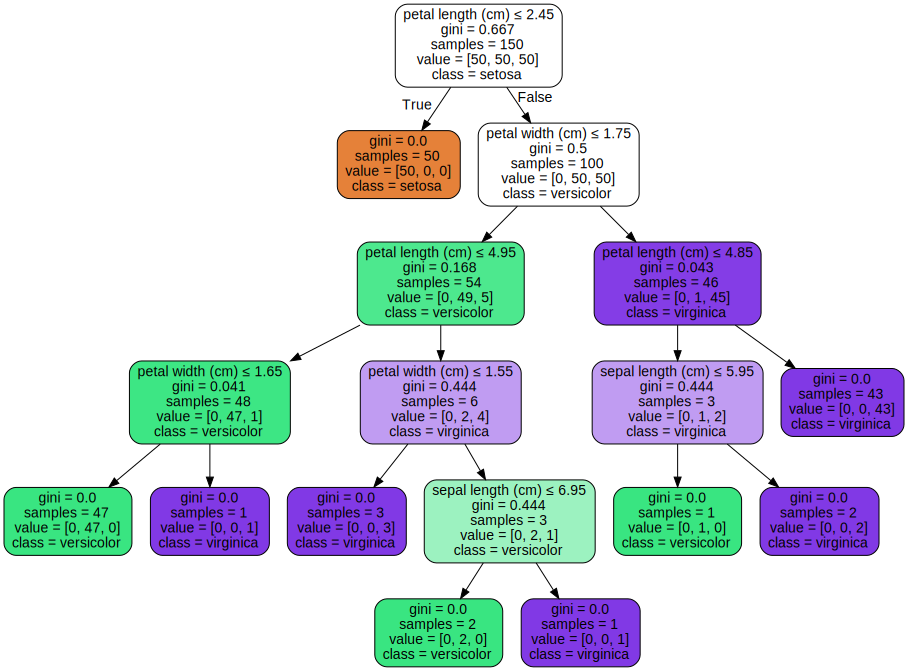

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
import graphviz
iris = load_iris()
X_features = iris.data
y_target = iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_features, y_target)
dot_data = tree.export_graphviz(clf, 
                                out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)
graph
# graph.render("iris")

Decision Tree의 파라미터들을 출력하겠습니다. 

In [ ]:
print(clf)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


각 모형 알고리즘이 내재하는 고유의 파라미터가 잇습니다.  
이 중에서 Max_Depth 파라미터만 조정해 다시 시각화를 진행하겠습니다.  
훈련 데이터에만 최적화되어 새로운 값이 들어올 때 틀릴 확률이 커지므로, Max_Dapth를 2로 지정한 후 그래프에 출력하겠습니다.

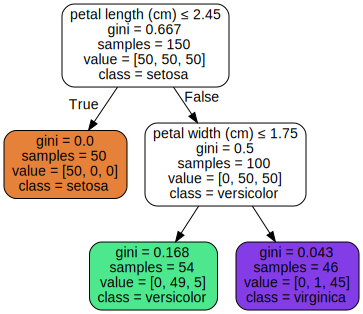

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=2)
# max_depth=2 인 트리를 그려봅시다. 
# max_depth=2 인 트리를 그려봅시다. 
# max_depth=2 인 트리를 그려봅시다. 
# max_depth=2 인 트리를 그려봅시다. 

Kaggle에서 자주 사용되는 XGBoost, LightGBM, 그리고 CatBoost 기법을 알아보겠습니다. 

하이퍼 파라미터의 기본적인 개념을 배웠다면, GridSearch와 Random Search 개념도 같이 알아두어야 합니다.  
특정 범위를 지정한 후 가장 좋은 성과를 내는 파라미터를 도출하는 방안을 제공하는 것이 GridSearch와 Random Search입니다. 

GridSearch는 **범위와 간격을 연구자가 미리 정해서** 각 경우의 수에 모두 대입해 최적의 경우의 수를 찾습니다.  
Random Search는 **특정 범위만 정해줄 뿐 어떤 값이 들어갈지는 난수를 통해 생성**합니다.  

우선 Grid Search의 예시 코드를 확인해보겠습니다.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                    test_size=0.2, random_state=42)

tree = DecisionTreeClassifier()

grid_search_params = {'max_depth': [1, 2], 
                     'max_features': [1, 2]}

grid_tree = GridSearchCV(tree, param_grid=grid_search_params, cv = 5)
grid_tree.fit(X_train, y_train)

scores = pd.DataFrame(grid_tree.cv_results_)
scores[['params', 'mean_test_score', 'rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'max_depth': 1, 'max_features': 1}",0.616667,4
1,"{'max_depth': 1, 'max_features': 2}",0.666667,3
2,"{'max_depth': 2, 'max_features': 1}",0.775000,2
3,"{'max_depth': 2, 'max_features': 2}",0.883333,1


총 4개 결과를 볼 수 있는데, 이는 하이퍼 파라미터가 순차적으로 학습 및 평가를 수행합니다.  
파라미터의 개수가 늘어날 때마다 곱셈으로 계산되어 늘어나는 특징을 갖고 있습니다.

이번에는 Random Search의 코드를 확인하겠습니다.  

In [ ]:
from scipy.stats import randint
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import pandas as pd

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                    test_size=0.2, random_state=42)

tree = DecisionTreeClassifier()

random_search_params = {'max_depth': randint(1, 5), 
                     'max_features': randint(1, 4)}

# random_tree를 만들어봅시다.
# random_tree를 만들어봅시다.

# random_tree의 score Data Frame 을 만들어봅시다.
# score를 Data Frame을 만들어봅시다. 

,params,mean_test_score,rank_test_score
0,"{'max_depth': 1, 'max_features': 3}",0.675000,7
1,"{'max_depth': 1, 'max_features': 2}",0.675000,7
2,"{'max_depth': 4, 'max_features': 1}",0.866667,5
3,"{'max_depth': 2, 'max_features': 3}",0.925000,3
4,"{'max_depth': 1, 'max_features': 2}",0.675000,7
5,"{'max_depth': 3, 'max_features': 1}",0.800000,6
6,"{'max_depth': 3, 'max_features': 2}",0.925000,3
7,"{'max_depth': 4, 'max_features': 2}",0.933333,1
8,"{'max_depth': 1, 'max_features': 3}",0.675000,7
9,"{'max_depth': 4, 'max_features': 3}",0.933333,1


Grid Search와 다르게 Random Search는 주어진 범위 내에서 다양하게 탐색하는 것을 확인할 수 있습니다.  
만약 변수의 개수가 늘어난다면 Grid Search는 계속 곱하기를 해야 해서 데이터 탐색의 비용이 기하급수적으로 커질 것입니다. 

## Modeling

### Library

본격적인 모델링을 적용하도록 필수 라이브러리를 불러옵니다.  
Google Colab은 기본적으로 XgBoost와 LightGBM을 곧바로 불러와서 사용할 수 있습니다. 

In [ ]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from math import sqrt
import time
import datetime 

### train_test_split

In [ ]:
y = new_train['fare_amount']
new_train.drop(['fare_amount'], axis=1, inplace=True)
X = new_train
# X와 Y의 shape를 확인해봅시다. 

((53997, 7), (53997,))

X는 독립 변수를 의미하며, y는 종속 변수를 의미합니다.  


### XGboost

데이터 세트를 분류해서 **검증 데이터**를 별도로 구성하겠습니다. 

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=123)
# 네 가지 Data의 shape를 확인해봅시다.

XG Boost 알고리즘을 적용합니다.  
하이퍼 파라미터는 임의로 지정해서 넣습니다.  
Eval_Set=[(X_val, y_val)]을 활용해 검증 데이터를 추가합니다.  


Verbose 파라미터는 검증 데이터의 학습 결과를 하나씩 출력해 보여줍니다. 

In [ ]:
params = {'max_depth':5,
          'learning_rate':0.5,
          'objective':'reg:linear',
          'eval_metric':'rmse',
          'early_stopping_rounds':5
         }
      
xgb_model = xgb.XGBRegressor(**params)
#xgb_model 을 출력해봅시다. 
start = time.time()

xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=True)

sec = time.time() - start
times = str(datetime.timedelta(seconds=sec)).split(".")
times = times[0]
print(times)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=5,
             eval_metric='rmse', gamma=0, importance_type='gain',
             learning_rate=0.5, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
             nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=1, verbosity=1)
[02:03:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:8.19605
[1]	validation_0-rmse:5.49488
[2]	validation_0-rmse:4.56644
[3]	validation_0-rmse:4.28582
[4]	validation_0-rmse:4.24593
[5]	validation_0-rmse:4.25462
[6]	validation_0-rmse:4.26433
[7]	validation_0-rmse:4.27621
[8]	validation_0-rmse:4.30134
[9]	validation_0-rmse:4.27761
[10]	validation_0-rmse:4.2712
[11

학습이 끝나면 바로 **테스트 데이터를 활용해 예측값**을 뽑습니다.  
그 후에 Sample Submission을 활용해 제출을 진행합니다.  
CSV 파일은 구글 코랩에서 다운로드하지 않고 **명령어를 통해 바로 제출**합시다.  

테스트 데이터를 Preprocessing 함수를 통해 가공하겠습니다. 

In [ ]:
new_test = preprocssing(test)

distances = []
pick_lon = new_test['pickup_longitude'].tolist()
pick_lat = new_test['pickup_latitude'].tolist()
drop_lon = new_test['dropoff_longitude'].tolist()
drop_lat = new_test['dropoff_latitude'].tolist()

for row in range(len(new_test)):
  dist = haversine((pick_lat[row], pick_lon[row]), (drop_lat[row], drop_lon[row]))
  distances.append(dist)

new_test['distance'] = distances
new_test.drop(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], axis=1, inplace=True)

Old Shape Size: (9914, 7)
New Shape Size: (9914, 10)


예측값을 뽑아내겠습니다.  

In [ ]:
y_pred_xgb = xgb_model.predict(new_test)
# y_pred_xgb 를 출력해보세요.

[10.515442  10.8846245  4.544116  ... 60.49668   25.85212    6.05947  ]


Sample_submission 파일을 불러와서 예측값을 추가하겠습니다.

In [ ]:
submission['fare_amount'] = y_pred_xgb
submission.to_csv('final_submission.csv', index=False)

캐글 명령어를 사용해 제출을 진행합니다.  

In [ ]:
!kaggle competitions submit -c new-york-city-taxi-fare-prediction -f final_submission.csv -m "Message"

100% 370k/370k [00:00<00:00, 1.20MB/s]
Successfully submitted to New York City Taxi Fare Prediction

#### Feature Importance Plot

Text(0.5, 0, 'Permutation Importance')

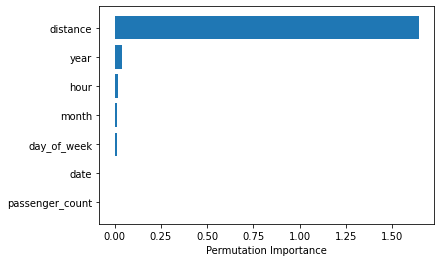

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(xgb_model, X_val, y_val)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

### LightGBM

이번에는 LightBGM에 임의의 파라미터를 설정하겠습니다.  
코드상 XGBoost와 크게 달라지지 않았습니다.  
제출하는 파일명을 기존과 구별하도록 LightGBM을 추가해 저장합시다.

In [ ]:
params = {'max_depth':5,
          'learning_rate':0.5,
          'objective':'regression',
          'metric':'rmse',
          'early_stopping_rounds':5
         }

start = time.time()
lgb_model = lgb.LGBMRegressor(**params)
print(lgb_model)
lgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=True)

sec = time.time() - start
times = str(datetime.timedelta(seconds=sec)).split(".")
times = times[0]
print(times)

y_pred_lgb = lgb_model.predict(new_test)
#y_pred_lgb를 출력해보세요. 

#y_pred_lgb를 submission 파일에 담아봅시다.
#y_pred_lgb를 submission 파일에 담아봅시다.

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              early_stopping_rounds=5, importance_type='split',
              learning_rate=0.5, max_depth=5, metric='rmse',
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31,
              objective='regression', random_state=None, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)
[1]	valid_0's rmse: 6.13213
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's rmse: 4.80094
[3]	valid_0's rmse: 4.3899
[4]	valid_0's rmse: 4.26092
[5]	valid_0's rmse: 4.21729
[6]	valid_0's rmse: 4.21778
[7]	valid_0's rmse: 4.21239
[8]	valid_0's rmse: 4.23947
[9]	valid_0's rmse: 4.25212
[10]	valid_0's rmse: 4.25856
[11]	valid_0's rmse: 4.2604
[12]	valid_0's rmse: 4.28108
Early stopping, best iteration is:
[7]	valid_0's rmse: 4.21239
0:00:00
[10

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


제출하고 최종 스코어를 확인하겠습니다.

In [ ]:
!kaggle competitions submit -c new-york-city-taxi-fare-prediction -f lightgbm_final_submission.csv -m "Message"

100% 454k/454k [00:00<00:00, 1.48MB/s]
Successfully submitted to New York City Taxi Fare Prediction

#### Feature Importance Plot

Text(0.5, 0, 'Permutation Importance')

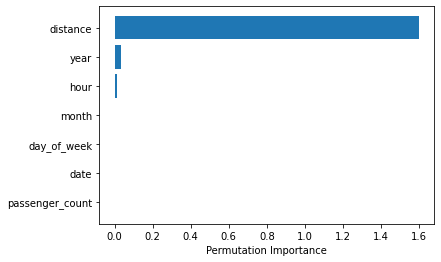

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(lgb_model, X_val, y_val)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
#Permutation Importance를 그래프화 해보세요. 

### Catboost

이제 CatBoost를 활용해 모형을 학습하겠습니다.  
구글 코랩에서 패키지를 설치하겠습니다.  

In [ ]:
!pip install catboost

     |████████████████████████████████| 69.2MB 118kB/s 


코드는 기존과 크게 다르지 않고, 파라미터명의 차이가 있어 주의해 입력해주세요.  
파일명은 CatBoost를 추가해 저장합니다.

In [ ]:
from catboost import CatBoostRegressor
params = {'depth':5,
          'learning_rate':0.5,
          'eval_metric':'RMSE',
          'early_stopping_rounds':5
         }

start = time.time()
cat_model = CatBoostRegressor(**params)
cat_model.fit(X_train, y_train, eval_set=(X_val, y_val), verbose=True)

sec = time.time() - start
times = str(datetime.timedelta(seconds=sec)).split(".")
times = times[0]
print(times)

y_pred_cat = cat_model.predict(new_test)
#y_pred_cat를 출력해보세요. 

#y_pred_cat를 파일로 만든 후, 제출해주세요.
#y_pred_cat를 파일로 만든 후, 제출해주세요.

0:	learn: 6.5270465	test: 6.4783004	best: 6.4783004 (0)	total: 54.4ms	remaining: 54.3s
1:	learn: 5.2689682	test: 5.0919990	best: 5.0919990 (1)	total: 61ms	remaining: 30.4s
2:	learn: 4.7986472	test: 4.6333005	best: 4.6333005 (2)	total: 67.2ms	remaining: 22.3s
3:	learn: 4.5979235	test: 4.4403268	best: 4.4403268 (3)	total: 73.4ms	remaining: 18.3s
4:	learn: 4.4924420	test: 4.3327791	best: 4.3327791 (4)	total: 79.6ms	remaining: 15.8s
5:	learn: 4.4326904	test: 4.3061620	best: 4.3061620 (5)	total: 86ms	remaining: 14.2s
6:	learn: 4.4058228	test: 4.3009413	best: 4.3009413 (6)	total: 92ms	remaining: 13.1s
7:	learn: 4.3792239	test: 4.3005755	best: 4.3005755 (7)	total: 98ms	remaining: 12.2s
8:	learn: 4.3668696	test: 4.3181492	best: 4.3005755 (7)	total: 104ms	remaining: 11.5s
9:	learn: 4.3374818	test: 4.2843097	best: 4.2843097 (9)	total: 110ms	remaining: 10.9s
10:	learn: 4.3170002	test: 4.2842661	best: 4.2842661 (10)	total: 116ms	remaining: 10.5s
11:	learn: 4.3080276	test: 4.2851028	best: 4.2842661

최종 결과값을 확인한 뒤 마지막으로 최종 Csv 파일을 제출합니다.

In [ ]:
!kaggle competitions submit -c new-york-city-taxi-fare-prediction -f catboost_final_submission.csv -m "Message"

100% 370k/370k [00:00<00:00, 1.04MB/s]
Successfully submitted to New York City Taxi Fare Prediction

#### Feature Importance Plot

Text(0.5, 0, 'Permutation Importance')

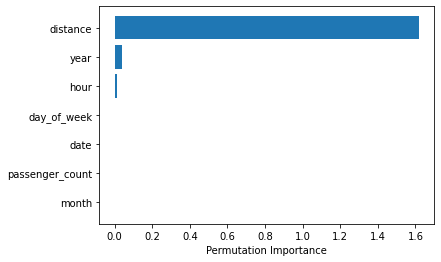

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(cat_model, X_val, y_val)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
#Permutation Importance를 그래프화 해보세요. 

### Simple Stacking Ensemble

In [ ]:
ensembled_prediction = (0.3 * y_pred_xgb) + (0.4 * y_pred_lgb) + (0.3 * y_pred_cat)

submission.to_csv('ensembled_final_submission.csv', index=False)
submission.head(10)

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.515442
1,2015-01-27 13:08:24.0000003,10.884624
2,2011-10-08 11:53:44.0000002,4.544116
3,2012-12-01 21:12:12.0000002,8.347191
4,2012-12-01 21:12:12.0000003,16.932850
5,2012-12-01 21:12:12.0000005,11.803183
6,2011-10-06 12:10:20.0000001,5.735718
7,2011-10-06 12:10:20.0000003,51.927792
8,2011-10-06 12:10:20.0000002,12.292977
9,2014-02-18 15:22:20.0000002,7.252489


In [ ]:
!kaggle competitions submit -c new-york-city-taxi-fare-prediction -f ensembled_final_submission.csv -m "Message"

100% 370k/370k [00:00<00:00, 1.04MB/s]
Successfully submitted to New York City Taxi Fare Prediction